# 5. 분석실습
## 5.1 iris 붗꽃 예측모델 
iris 실습을 통해 전반적인 흐름을 파악해 보자. 
- 프랑스 국화 : 좋은 소식, 잘 전해 주세요, 사랑의 메세지, 변덕스러움
- 데이터 과학에서 Iris DataSet
- 아이리스 품종 중 Setosa, Versicolor, Virginica 분류에 대한 [**로널드 피셔**](https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%84%90%EB%93%9C_%ED%94%BC%EC%85%94)의  1936년 논문에서 사용된 데이터 셋.
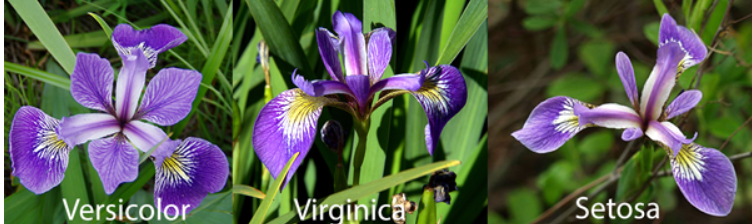

## 5.2 데이터셋 확인 
### 5.2.1 용어 
1. 피쳐(Feature)
    - 속성, 입력데이터, 독립변수
    - Target이 왜 그런 값을 가지게 되었는지를 설명하는 변수. 
    - Target값을 **예측하기 위해** 학습해야 하는 값들. 


2. 레이블(Label), 타겟(Target)
    - 결정값, 출력데이터, 종속변수
    - 예측 대상이 되는 값. 지도학습시 **학습을 위해 주어지는 정답 데이터**
    - 분류의 경우 레이블을 구성하는 고유값들을 **클래스(class)**라고 한다.
    
### 5.2.2 데이터셋 가져오기 
- scikit-learn은 머신러닝 모델을 테스트 하기위한 데이터셋을 제공한다.
- 이런 데이터셋을 Toy dataset이라고 한다.
- 패키지 : sklearn.datasets
- 함수   : load_xxxx()

In [55]:
from sklearn.datasets import load_iris
iris = load_iris() # 함수 임포트 호출하기 
# print(iris)

### 5.2.3 내장 데이터셋 구성 
- scikit-learn의 dataset은 딕셔너리 형태의 Bunch 클래스 객체이다.
- keys() 함수로 key값들을 조회
   
|구성|설명|
|--|--|
|**target_names**|예측하려는 값(class)을 가진 문자열 배열|
|**target**|Label(출력데이터)|
|**data**|Feature(입력변수)|
|**feature_names**|입력변수 각 항목의 이름|
|DESCR|데이터셋에 대한 설명|
|filename|파일 경로 및 이름|

In [58]:
print('- keys :',iris.keys())
# print(iris.data)
print('- data.shape : ',iris['data'].shape)
print('- data의 타입 :',type(iris['data']))
print('- feature_names :',iris['feature_names'])
print('- target_names :',iris['target_names'])
print('- target :',iris['target'])
print('- filename :',iris['filename'])
# print(iris['DESCR'])

- keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
- data.shape :  (150, 4)
- data의 타입 : <class 'numpy.ndarray'>
- feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
- target_names : ['setosa' 'versicolor' 'virginica']
- target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
- filename : /opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/iris.csv


### 5.2.4 데이터셋을 데이터프레임으로 
- 데이터셋을 데이터 프레임 생성한 후 데이터를 확인한다. 

In [59]:
import numpy as np
import pandas as pd

iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['species'] = iris['target']
iris_df
# iris_df.shape
# iris_df.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 5.3 예측
1. 문제정의 
    - 내가 발견한 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다. 이 꽃는 Iris의 무슨 종일까?


2. 데이터셋에서 찾아보기 
    - 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다.  

In [61]:
iris_df[(iris_df['sepal length (cm)'] == 5) & 
        (iris_df['sepal width (cm)'] == 3.5)]

print('- 결과 :',iris['target_names'][0])

- 결과 : setosa


3. 머신러닝으로 우리가 하려는 것 
    - 프로그래머가 직접 규칙(패턴)을 만드는 대신 컴퓨터가 데이터를 학습하여 규칙을 자동으로 만들도록 하는 것이다.
    - 그렇다면 어떤 알고리즘을 통해서 구현할 수 있을까? 
    - 결정트리 모델을 사용해서 결과를 분류해보도록 하자. 
    - 결정트리 알고리즘은 추후 다시 자세히 알아보자. 

### 5.3.1 결정트리 모델을 통해 분류하기
- 독립 변수의 조건에 따라 종속 변수를 분리 
- 머신러닝의 몇안되는 White box 모델
- 결과에 대한 해석이 가능하다.
- 과적합(Overfitting)이 잘 일어나는 단점이 있다. 
- 랜덤 포레스트(Random Forest), Gradient Boosting, Adaptive boosting과 같은 Boosting 계열 앙상블이 결정트리를  기반으로 하고 있다


### 5.3.2 구현
1. 모델 import : 결정트리 모델을 사용해서 분류해보자. 
2. 모델 생성
3. 모델 학습 : fit(feature, label)
    
4. 예측 : predict([featuer]) , 전달 값으로 2차원 배열의 feature을 입력해줘야 한다. 

In [63]:
# 1. 모델 import
from sklearn.tree import DecisionTreeClassifier

# 2. 모델생성 
tree = DecisionTreeClassifier(random_state = 1) # 랜덤 값을 동일하게 하려면 

# 3. 모델학습 
tree.fit(iris['data'], iris['target']) # DecisionTreeClassifier() 반환 

# 4. 예측하기 
# 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다.  
pred = tree.predict([[5, 3.5, 1.4, 0.25]])

# 반환값이 레이블(label)이 된다.  array([0]) 
print('- 예측 결과 :',pred) 

# [0]번꽃이다. 그럼 [0]번 꽃이 뭐냐를 알아야겠지. 
print('- 예측 결과 이름 조회 :',iris['target_names'][pred])

- 예측 결과 : [0]
- 예측 결과 이름 조회 : ['setosa']


In [51]:
# 꽃을 여러개 예측해보자 
my_irsis = [
    [5, 3.5, 1.4, 0.25],
    [5.1, 3.5, 1.4,0.2], 
    [2, 3, 5, 7]
]

pred2 = tree.predict(my_irsis) 
print('- 예측 결과 :', pred2) 

print('- 예측 결과 이름 조회 :',iris['target_names'][pred2])

- 예측 결과 : [0 0 2]
- 예측 결과 이름 조회 : ['setosa' 'setosa' 'virginica']


## 5.4 분리 train_test_split
- 위의 예는 우리가 만든 모델이 성능이 좋은 모델인지 나쁜 모델인지 알 수 없다.
- 따라서 검증과정이 필요하다. 검증을 확인하기 위해서는 학습하지 않은 데이터들로 검증을 해야한다.
- 즉 전체 데이터 셋을 학습용(train_set)과 검증용(test_set)으로 분리해서 그 모델을 평가할 때 사용한다. 
- 모델훈련 성능이 좋으려면 데이터 셋이 많으면 많을 수록 패턴을 찾기 좋다. 
- 따라서 데이터 셋의 양에 따라서 훈련(학습)데이터와 검증(테스트)데이터의 비율이 달라진다. 
- 보통 훈련데이터와 테스트데이터의 비율은 8:2 또는 7:3 정도로 나누는데 데이터셋이 충분하다면 6:4까지도 나눈다.
- 데이터 셋을 분할 시 주의할 점은 **각 클래스(분류대상)가 같은 비율로 나눠져야하는 점**이다. 

In [40]:
from sklearn.model_selection import train_test_split # dataSet을 train Dataset, test datase으로 분할 

# 8 : 2 로 분리해보자. 
X_train, X_test, y_train, y_test = train_test_split(
                                iris['data'],  # input dataset
                                iris['target'], # output datase
                                test_size = 0.2, # test set의 비율 (0 ~ 1), default값은 0.25
                                stratify = iris['target'], # 클래스가 원본(raw data)과 같은 비율로 나눠라.
                                random_state = 1 # random의 seed값 정의 
) # 튜플로 반환된다.  X 는 인풋데이터 , Y는 아웃풋 데이터 

print('- ',X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 

print('- ',y_test) # 비율에 맞춰서 테스트의 결과 값들이 출력된다. 

print('- ',np.unique(y_test, return_counts = True)) # 10, 10, 10 개로 1:1:1 비율로 동일하게 갯수가 나왔다. 왜? staratify를 설정

print('- ',np.unique(iris['target'], return_counts = True)) # 원본을 보게 되면 50:50:50 1:1:1 비율 동일 . 왜? staratify를 설정

-  (120, 4) (30, 4) (120,) (30,)
-  [2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
-  (array([0, 1, 2]), array([10, 10, 10]))
-  (array([0, 1, 2]), array([50, 50, 50]))


- x, y 왜 나눴나? input과 output
- input은 feature 정보, output은 target으로 각각의 train과 test로 순으로 나눠진다. 
- X 대문자로 표기한 이유는? X는 인풋데이터로 feature이며 feature는 데이터의 속성을 의미한다. 데이터의 속성은 여러개의 값으로 구성되어 있음을 관례적으로 대문자로 표기하였다. 
- 분할할때 먼저 섞은 다음에 비율에 맞춰서 나눠지게 된다. 랜덤하게 섞여지기 때문에 강사님과 결과가 다르게 나올수가 있다. 랜덤성을 줄여주기 위해서 random_state = 1 값을 줘서 랜덤의 시드값을 정의해준다. 

## 5.5 모델생성

In [42]:
# 결정트리로 모델을 생성해보자 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

## 5.6 모델 학습 fit
- train 값들을 통해 학습을 시킨다. 

In [43]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 5.7 평가
- sklearn.metrics 모듈에 머신러닝 평가지표 함수들이 있다.
    1. accuracy(정확도) : 전체 데이터셋 중에 맞춘 갯수의 비율 
    2. Confusion matrix : 

### 5.7.1  accuracy(정확도)
    - 전체 데이터셋중 맞춘 개수의 비율
    - from sklearn.metrics import accuracy_score
    - accuracy_score(학습결과, 예측결과) 

In [45]:
from sklearn.metrics import accuracy_score # 정확도를 검증하는 함수 

# 1) train set으로 정확도 확인 
pred_train = tree.predict(X_train) # 2차열 배열
# print(X_train) # input 
# print(pred_train) # output 
acc_train_score = accuracy_score(y_train, pred_train) # accuracy_score(정답, 예측결과)
print("- train set 정확도 결과 :", acc_train_score) # 1.0이면 정확도 120개 중에 120개가 다 맞은 것 

# 2) test set으로 정확도 확인 
pred_test = tree.predict(X_test)
# print(pred_test)
acc_train_score = accuracy_score(y_test, pred_test)
print('- test  set 정확도 결과 :', acc_train_score) # 30개 중에 29개가 맞은거 

- train set 정확도 결과 : 1.0
- test  set 정확도 결과 : 0.9666666666666667


### 5.7.2 혼동행렬 (Confusion Matrix)
    - 예측 한 것이 실제 무엇이었는지를 표로 구성한 평가 지표
    - 분류의 평가 지표로 사용된다.
    - from sklearn.metrics import confusion_matrix
    - confusion_matrix(학습결과, 예측결과)
    - axis=0: 실제, axis=1: 예측

In [53]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

print('- train 결과:\n',cm_train)

print('- test 결과: \n',cm_test)

- train 결과:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
- test 결과: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


- 2를 1로 예측한 것 1개, 2를 2로 예측한 것 9개로 맞춘 결과와 틀린 결과를 확인할 수 있다.
- 이를 통해서 틀린 결과가 왜 잘못 나왔는지 확인해서 튜닝하거나 수정할 수 있다. 